# KNN & Linear Regression - Breast Cancer predication

Métodos de Inteligência Atificial aplicados à classificação de Nódulos Mamários

## Sobre o conjunto de dados

As características são calculadas a partir de uma imagem digitalizada de um "Punção Aspirativa por Agulha Fina (PAAF)" de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

Esse banco de dados também está disponível no Kaggle, no link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Também pode ser encontrado no UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informações do atributo:

    1) ID número
    2) Diagnóstico (M = Maligno, B = Benigno)
    3-32) Dez características de valor real são computadas para cada núcleo celular:
        a) Raio (média das distâncias do centro aos pontos no perímetro)
        b) Textura (desvio padrão dos valores da escala de cinza)
        c) Perímetro
        d) Área
        e) Suavidade (variação local nos comprimentos do raio)
        f) Compacidade (perímetro²/ área - 1,0)
        g) Concavidade (severidade das porções côncavas do contorno)
        h) Pontos côncavos (número de porções côncavas do contorno)
        i) Simetria
        j) Dimensão fractal ("aproximação da linha costeira" - 1)

A média, o erro padrão e o "pior" (média dos três maiores valores) destes parâmetros foram computados para cada imagem, resultando em 30 variáveis, por exemplo, o campo 3 é o raio médio, o campo 13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

Valores de atributos ausentes: nenhum

Distribuição de classes: 357 benignas, 212 malignas

## Importar, Manipular e Tratar os dados

Para o desenvolvimento do modelo serão utilizadas 4 bibliotecas:

1) Pandas
2) Numpy
3) Matplotlib
4) Sklearn

A seguir tem-se a instalação e a improtação das bibliotecas, seguido da leitura dos dados e da manipulação do cabeçalho:

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install -U scikit-learn

In [1]:
# Bibliotecas de Machine Learning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#Bibliotecas de para leitura e tratamento de dados
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Leitura do arquivo Breast Cancer Prediction.csv
project_data = pd.read_csv("Breast Cancer Prediction.csv", sep = ';')
project_data = project_data.drop(columns=["id"]) #Remoção de dados de cadastro dos pacientes

#Tradução do Cabeçalho
project_data.rename(columns = {"diagnosis":"Diagnóstico",
                               "Radius_mean":"Raio Médio",                          
                               "Texture_mean":"Textura Média",                      
                               "perimeter_mean":"Perímetro Médio",                  
                               "area_mean":"Área Média",                            
                               "smoothness_mean":"Suavidade Média",                 
                               "compactness_mean":"Compacidade Média",              
                               "concavity_mean":"Concavidade Média",                
                               "concave points_mean":"Pontos Côncavos Médios",      
                               "symmetry_mean":"Simetria Média",                    
                               "fractal_dimension_mean":"Dimensão Fractal Média",

                               "radius_se":"Erro Padrão do Raio",                          
                               "texture_se":"Erro Padrão da Textura",                      
                               "perimeter_se":"Erro Padrão do Perímetro",                  
                               "area_se":"Erro Padrão da Área",                            
                               "smoothness_se":"Erro Padrão da Suavidade",                 
                               "compactness_se":"Erro Padrão da Compacidade",              
                               "concavity_se":"Erro Padrão da Concavidade",                
                               "concave points_se":"Erro Padrão dos Pontos Côncavos",      
                               "symmetry_se":"Erro Padrão da Simetria",                    
                               "fractal_dimension_se":"Erro Padrão da Dimensão Fractal",
                               
                               "radius_worst":"Pior Raio",
                               "texture_worst":"Pior Textura",
                               "perimeter_worst":"Pior Perímetro",
                               "area_worst":"Pior Área",
                               "smoothness_worst":"Pior Suavidade",
                               "compactness_worst":"Pior Compacidade",
                               "concavity_worst":"Pior Concavidade",
                               "concave points_worst":"Piores Pontos Côncavos",
                               "symmetry_worst":"Pior Simetria",
                               "fractal_dimension_worst":"Pior Dimensão Fractal"}, inplace = True)

project_data.head()

,Diagnóstico,Raio Médio,Textura Média,Perímetro Médio,Área Média,Suavidade Média,Compacidade Média,Concavidade Média,Pontos Côncavos Médios,Simetria Média,...,Pior Raio,Pior Textura,Pior Perímetro,Pior Área,Pior Suavidade,Pior Compacidade,Pior Concavidade,Piores Pontos Côncavos,Pior Simetria,Pior Dimensão Fractal
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Quantidade de amostras: 569


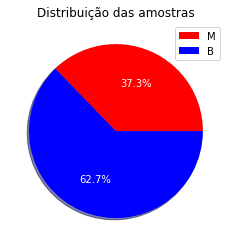

In [3]:
#Histograma da quantidade de amostras de Nódulos Benígnos e Malígnos
print("Quantidade de amostras:", len(project_data["Diagnóstico"]))
counts = project_data["Diagnóstico"].value_counts()
m = counts["M"]
b = counts["B"]

sizes = [m,b]
plt.title("Distribuição das amostras")
plt.pie(sizes, colors =["r","b"], shadow = True, autopct = "%1.1f%%", textprops = dict(color="w"))
plt.legend(["M","B"])
plt.show()

In [4]:
#Identificando os dados correspondentes de cada classe
dM = (project_data.loc[project_data['Diagnóstico'] == "M"]).values
dB = (project_data.loc[project_data['Diagnóstico'] == "B"]).values

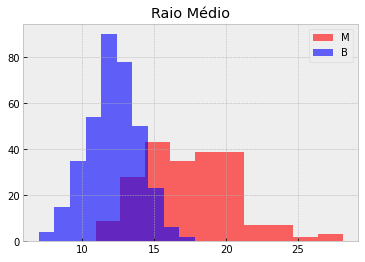

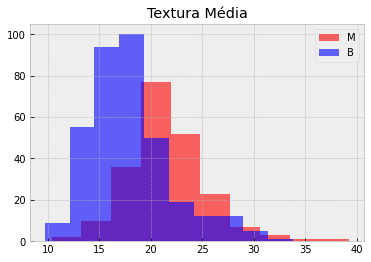

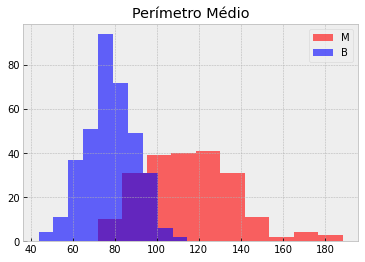

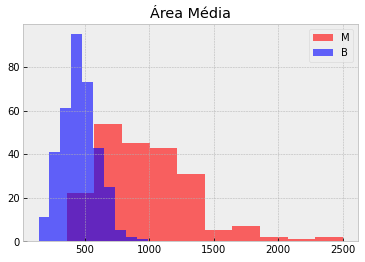

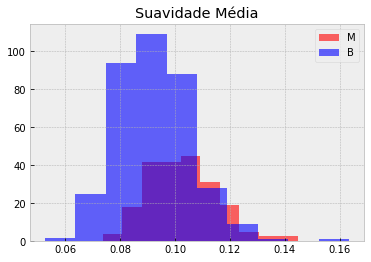

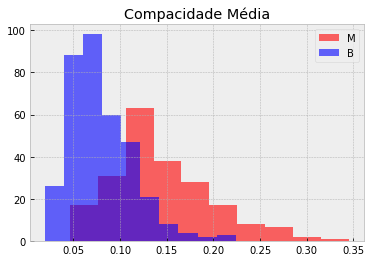

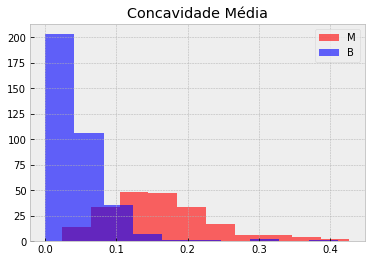

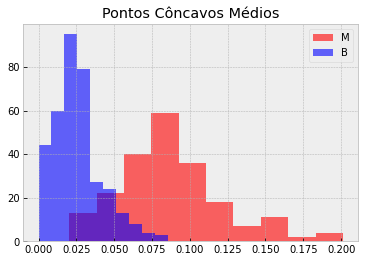

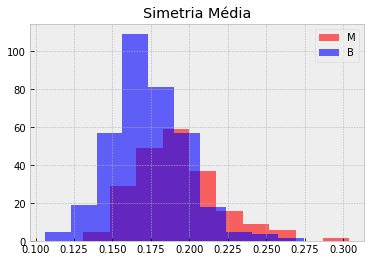

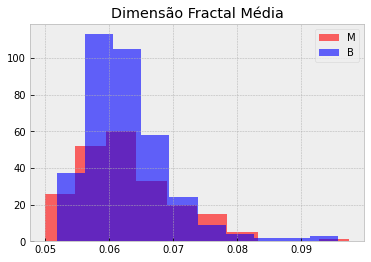

In [5]:
#Criação dos Gráficos de Ocorrência das Característica Médias dos Nódulo
for i in range(1,11):
  plt.style.use('bmh')
  plt.hist(dM[:,i],color = 'r', alpha=0.6)
  plt.hist(dB[:,i],color = 'b', alpha=0.6)
  plt.title(project_data.columns[i])
  plt.legend(["M","B"])
  plt.show()

In [6]:
# Conversão dos dados não numéricos para parametros numéricos
convert = {'M':1, 'B':-1}
Y = project_data["Diagnóstico"].map(convert)

#Divisão do conjunto de dados para Treinamento e Teste
prop_test = 0.2
X = project_data.drop(columns=["Diagnóstico"])
X_train_ref, X_test_ref, Y_train_ref, Y_test_ref= train_test_split(X, Y, test_size = prop_test)


## K-Nearest Neighbors


In [69]:
#Ordenando o conjunto de treinamento e de teste para o modelo K-Nearest Neighbors 
X_train =  X_train_ref.copy()
X_test  =  X_test_ref.copy()
Y_train =  Y_train_ref.copy()
Y_test  =  Y_test_ref.copy()

#Selecionando o modelo, a quantia de vizinhos comparados pelo modelo e realizando o treinamento
KNN = KNeighborsRegressor(n_neighbors = 3)
KNN.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [70]:
#Calculando Acurácia do treinamento
Y_hat_train = KNN.predict(X_train)
D_hat_train = np.sign(Y_hat_train)
error_train = np.abs((D_hat_train - Y_train)/2)
acc_train = 1 - (np.sum(error_train)/error_train.size)
print("Acuracia de treinamento:", acc_train)

#Calculando Acurácia do teste
Y_hat_test = KNN.predict(X_test)
D_hat_test = np.sign(Y_hat_test)
error_test = np.abs((D_hat_test - Y_test)/2)
acc_test = 1 - (np.sum(error_test)/error_test.size)
print("Acuracia de teste:", acc_test)

Acuracia de treinamento: 0.9472527472527472
Acuracia de teste: 0.956140350877193


In [71]:
#Rearranjo Valores para gerar a Matrix de Confusão
Y_test = np.array(Y_test)

D_hat_test = np.clip(D_hat_test, 0, 1)
Y_test     = np.clip(Y_test, 0, 1)

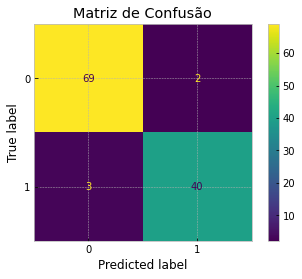

In [73]:
#Construindo a Matriz de Confusao Treinamento
Y_test = np.float64(Y_test)
D_hat_test = np.float64(D_hat_test)
Conf_Matriz = confusion_matrix(Y_test, D_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_Matriz)
disp.plot()

plt.title("Matriz de Confusão")
plt.show()

AUC: 0.977


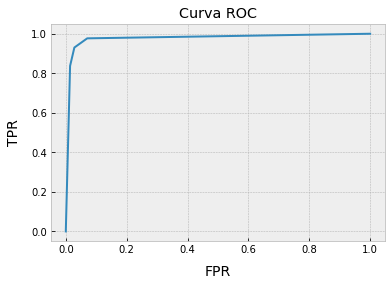

In [74]:
#Curva ROC treinamento
fpr,tpr,thresholds = roc_curve(Y_test,Y_hat_test)
plt.plot(fpr,tpr)
auc = roc_auc_score(Y_test, Y_hat_test)
print('AUC: %.3f' % auc)

plt.xlabel('FPR', fontsize=14, labelpad=10)
plt.ylabel('TPR', fontsize=14, labelpad=10)
plt.title("Curva ROC")
plt.show()

## Linear Regression

In [75]:
X_train =  X_train_ref.copy()
X_test  =  X_test_ref.copy()
Y_train =  Y_train_ref.copy()
Y_test  =  Y_test_ref.copy()
LN = LinearRegression()
LN.fit(X_train, Y_train)

LinearRegression()

In [76]:
#Acurácia do treinamento
Y_hat_train = LN.predict(X_train)
D_hat_train = np.sign(Y_hat_train)
error_train = np.abs((D_hat_train - Y_train)/2)
acc_train = 1 - (np.sum(error_train)/error_train.size)
print("Acuracia de treinamento:", acc_train)

#Acurácia do teste
Y_hat_test = LN.predict(X_test)
D_hat_test = np.sign(Y_hat_test)
error_test = np.abs((D_hat_test - Y_test)/2)
acc_test = 1 - (np.sum(error_test)/error_test.size)
print("Acuracia de teste:", acc_test)

Acuracia de treinamento: 0.9648351648351648
Acuracia de teste: 0.9649122807017544


In [77]:
#Rearranjo Valores para gerar a Matrix de Confusão
D_hat_test = np.clip(D_hat_test, 0, 1)
Y_test     = np.clip(Y_test, 0, 1)

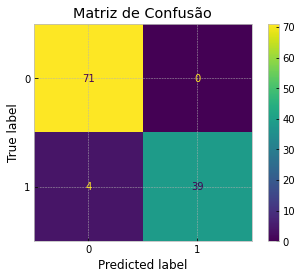

In [78]:
#Construindo a Matriz de Confusao Treinamento
Y_test = np.float64(Y_test)
D_hat_test = np.float64(D_hat_test)
Conf_Matriz = confusion_matrix(Y_test, D_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_Matriz)
disp.plot()

plt.title("Matriz de Confusão")
plt.show()

AUC: 0.996


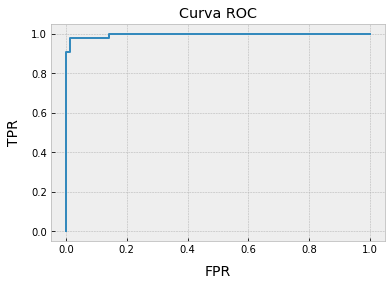

In [79]:
#Curva ROC treinamento
fpr,tpr,thresholds = roc_curve(Y_test,Y_hat_test)
plt.plot(fpr,tpr)
auc = roc_auc_score(Y_test, Y_hat_test)
print('AUC: %.3f' % auc)

plt.xlabel('FPR', fontsize=14, labelpad=10)
plt.ylabel('TPR', fontsize=14, labelpad=10)
plt.title("Curva ROC")
plt.show()

## Conclusão

Observe que métodos mais simples não necessariamente resultam em resultados inferiores em acurácia. A Classificação através da "Regressão Linear" se mostra superior em acurácia em relação ao modelo dos "K Vizinhos Mais Próximos", mesmo sendo um modelo "mais simples".